In [92]:
from fugue_notebook import setup
import pandas as pd
import seaborn as sns
from typing import List, Any, Dict, Tuple, Iterable
import matplotlib.pyplot as plt
setup()


<IPython.core.display.Javascript object>

In [93]:
# schema: *, speed:double, trip_start_hour:int
def my_transformer(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df['trip_miles'].notna()) & (df['trip_miles'] != 0) &
            (df['trip_seconds'].notna()) & (df['trip_seconds'] != 0)]
    df['trips_km'] = df['trip_miles'] * 1.609344
    df['trips_total_hour'] = df['trip_seconds'] / 3600
    df['speed'] = df['trips_km'] / df['trips_total_hour']
    df['trip_start_hour'] = pd.to_datetime(df['trip_start_timestamp']).dt.hour
    return df

In [94]:
def plotterBarChart(df: pd.DataFrame, x_col: str, y_col: str, title: str, x_title: str, y_title: str) -> None:
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.ylabel(y_title, fontsize=10)
    plt.xlabel(x_title, fontsize=10)
    plt.title(title, fontsize=14, color='blue')
    plt.show()


In [95]:
%%fsql 
df_taxi = LOAD "taxi_trips.csv" (header = true , infer_schema=true)
YIELD DATAFRAME AS df_taxi

In [97]:
%%fsql 
df_transform = SELECT * FROM df_taxi
TRANSFORM USING my_transformer
YIELD DATAFRAME AS df_transform
PRINT



C:\Users\RAZER\AppData\Local\Temp\ipykernel_12224\2367788655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trips_km'] = df['trip_miles'] * 1.609344
C:\Users\RAZER\AppData\Local\Temp\ipykernel_12224\2367788655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trips_total_hour'] = df['trip_seconds'] / 3600
C:\Users\RAZER\AppData\Local\Temp\ipykernel_12224\2367788655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,unique_key:str,trip_start_timestamp:str,trip_total:double,trip_miles:double,trip_seconds:double,company:str,speed:double,trip_start_hour:int
0,4341c6b64df74872ac59c2c707864a73352465b1,2022-10-31 17:00:00+00:00,74.18,15.65,1238.0,Chicago Taxicab,73.239452,17
1,7995076524f11923dfc276caa315c6c82ebacfd2,2022-04-24 12:00:00+00:00,48.50,17.63,2076.0,Koam Taxi Association,49.201274,12
2,7c62e98accacffceb53db4aa051c95b3716f7f47,2022-04-27 11:15:00+00:00,33.75,7.73,2934.0,Patriot Taxi Dba Peace Taxi Associat,15.264085,11
3,7a56b72cb5bb2d8e2fd2e3cb0d5da87e97a9b710,2022-04-28 18:45:00+00:00,12.25,2.20,780.0,312 Medallion Management Corp,16.341031,18
4,7ba89eaed4ca3ba06d45c3e8f153daedc5b8a628,2022-04-01 01:30:00+00:00,47.10,13.70,1057.0,Setare Inc,75.092570,1
5,7a25d0392e1113720553397fcf24e3cb7907a80f,2022-04-08 15:15:00+00:00,8.75,0.92,340.0,Patriot Taxi Dba Peace Taxi Associat,15.676904,15
6,7dceda7a64f1a1d87a243041727e7337caca3a79,2022-04-11 19:00:00+00:00,5.50,0.60,360.0,KOAM Taxi Association,9.656064,19
7,7bd35167e85d34ae41e4e1131eddb4a6eaf3022d,2022-04-11 12:15:00+00:00,62.96,20.90,1801.0,Chicago Taxicab,67.233227,12
9,7bb55d38f5c94e5735ad2a884ab6e86817585c83,2022-04-02 10:45:00+00:00,51.70,16.10,2160.0,KOAM Taxi Association,43.184064,10
11,7f15ad3650c844450af0e0de51934b4b2c438fa5,2022-04-19 16:15:00+00:00,48.30,12.60,1842.0,Chicago Taxicab,39.630751,16


,trip_start_hour:int,avg_speed:double
0,0,46.892878
1,1,43.131589
2,2,38.751345
3,3,45.137537
4,4,54.010008
5,5,57.600153
6,6,46.471717
7,7,39.159939
8,8,32.642041
9,9,37.270223


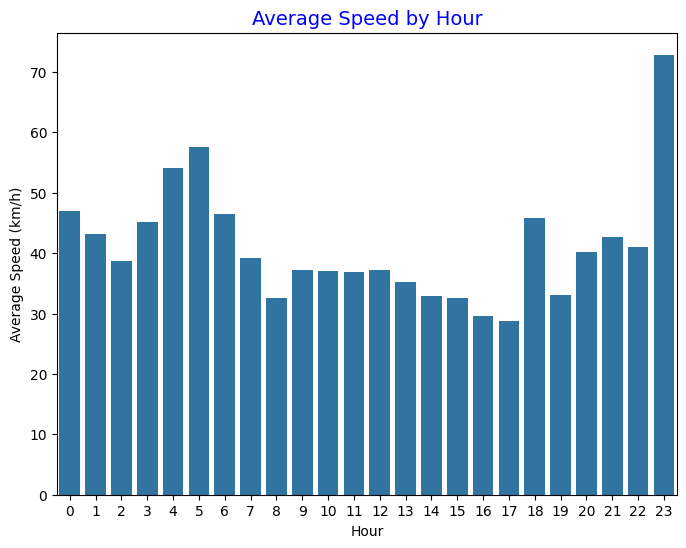

In [103]:
%%fsql
SELECT trip_start_hour, AVG(speed) AS avg_speed FROM df_transform
GROUP BY trip_start_hour
PRINT 24 ROWS
OUTPUT USING plotterBarChart(x_col="trip_start_hour", y_col="avg_speed", title="Vận tốc trung bình", x_title="Hour", y_title="Average Speed")